# Financial Crime Detection - Complete Demo

This notebook demonstrates the complete workflow for financial crime detection using our generic framework.

**Workflow Overview:**
1. **Data Loading & Exploration** - Load and analyze the dataset
2. **Data Preparation** - Split data into train/val/test sets
3. **Model Training** - Train the financial crime detection model
4. **Model Evaluation** - Evaluate performance with metrics and visualizations
5. **Prediction Examples** - Test the model on new examples
6. **Analysis & Insights** - Analyze results and model behavior

**Current Focus:** Anti-Money Laundering (AML) Detection  
**Framework:** Generic and extensible for other financial crime types

## Setup and Imports

In [16]:
# Core imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Our financial crime detection package
from src.utils import (
    load_fincrime_dataset,
    prepare_data_splits,
    print_dataset_summary,
    analyze_dataset,
    plot_dataset_overview
)
from src.model import (
    FinCrimeModel,
)

from src.predictor import (
    FinCrimePredictor,
)

from src.evaluator import (
    FinCrimeEvaluator,
)

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All imports successful!")
print("📊 Ready to start financial crime detection demo")

✅ All imports successful!
📊 Ready to start financial crime detection demo


## 1. Data Loading & Exploration

Let's load and explore our financial crime dataset.

In [5]:
# Load the dataset
print("📁 Loading financial crime dataset...")

# Try to load the actual dataset
try:
    df = load_fincrime_dataset('../data/AntiMoneyLaundering-v4.csv')
    data_source = "AntiMoneyLaundering-v4.csv"
except Exception as e:
    print(f"⚠️ Could not load dataset: {e}")
    print("🔧 Creating sample dataset for demonstration...")
    
    # Create sample AML dataset
    sample_data = {
        'conversation': [
            "Standard transaction processing for client account with proper documentation",
            "Keep transfers under 9k to avoid reporting requirements and paperwork",
            "Route through offshore entities in Cayman Islands for privacy reasons",
            "Regular business transaction with all compliance documentation provided",
            "Break this large deposit into smaller amounts to avoid detection",
            "Client provided all necessary compliance documentation and KYC materials",
            "Use multiple accounts to structure the payments below reporting thresholds",
            "Standard wire transfer with proper authorization and documentation",
            "Layer the transactions through multiple jurisdictions to obscure origin",
            "Normal business relationship with transparent ownership structure",
            "CTR filing was missed for this large cash deposit transaction",
            "All regulatory requirements met for this international wire transfer",
            "Shell company arrangement to hide the true beneficial ownership",
            "Legitimate business operations with proper corporate governance",
            "Smurfing operation using multiple individuals for small deposits",
            "Routine transaction monitoring shows normal business patterns",
            "Third party intermediary to avoid direct involvement in transaction",
            "Standard compliance procedures followed for this client onboarding",
            "Tax avoidance scheme using offshore structures illegally",
            "Investment portfolio management with proper fiduciary oversight"
        ] * 35,  # Multiply to get ~700 samples
        'label': [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0] * 35,
        'category': [
            'Normal Business', 'Amount Threshold', 'Offshore Accounts', 'Normal Business',
            'Structuring', 'Normal Business', 'Structuring', 'Normal Business',
            'Layering', 'Normal Business', 'CTR Issues', 'Normal Business',
            'Shell Company', 'Normal Business', 'Smurfing', 'Normal Business',
            'Third Party Transfer', 'Normal Business', 'Tax Avoidance', 'Normal Business'
        ] * 35
    }
    
    df = pd.DataFrame(sample_data)
    data_source = "Sample AML Dataset (Demo)"

print(f"✅ Dataset loaded: {data_source}")
print(f"📊 Dataset shape: {df.shape}")

# Display first few examples
print("\n🔍 Sample data:")
display(df.head())

📁 Loading financial crime dataset...
Dataset loaded successfully from ../data/AntiMoneyLaundering-v4.csv
Dataset shape: (726, 3)
✅ Dataset loaded: AntiMoneyLaundering-v4.csv
📊 Dataset shape: (726, 3)

🔍 Sample data:


,label,conversation,category
0,1,"Hi Sarah, I've been working with Mr. Johnson o...",Amount Threshold
1,1,The client called this morning about her regul...,Amount Threshold
2,1,We have a new client who's very particular abo...,Amount Threshold
3,0,The Henderson account processed a 25k wire tra...,Amount Threshold
4,0,Our institutional client needs to move 50k for...,Amount Threshold


In [6]:
# Comprehensive dataset analysis
print("📈 Dataset Analysis:")
print("=" * 50)

# Use our utility function for detailed analysis
print_dataset_summary(df)

📈 Dataset Analysis:
=== DATASET OVERVIEW ===
Total samples: 726
Features: ['label', 'conversation', 'category']
Missing values: 0

=== LABEL DISTRIBUTION ===
Suspicious (1): 363 (50.0%)
Normal (0): 363 (50.0%)

=== SUSPICIOUS ACTIVITY CATEGORIES ===
Layering: 39
Digital Asset Laundering: 30
Trade-Based Money Laundering: 30
Shell Company Activity: 30
Structuring/Smurfing: 30
Third Party Transfer: 9
Illegal Activity: 9
Investigation: 9
Bearer Instruments: 9
Patriot Act: 9
Numbered Accounts: 9
Geographic Risk: 9
SAR Avoidance: 9
Shell Company: 9
Amount Threshold: 9
Beneficial Ownership: 9
Dirty Money: 9
ETF Activity: 9
Clean Money: 9
Micro-structuring: 9
Smurfing: 9
Structuring: 9
Offshore Accounts: 9
CTR Issues: 9
Tax Avoidance: 9
AML Concerns: 9
PEP Client: 9
Tax Haven: 6

=== NORMAL ACTIVITY CATEGORIES ===
Legitimate Urgent Transactions: 30
Documentation & Compliance: 30
Routine Operations & Reporting: 30
Client Onboarding & KYC: 30
Standard Trading Operations: 30
Third Party Transfer:

📊 Dataset Visualizations:


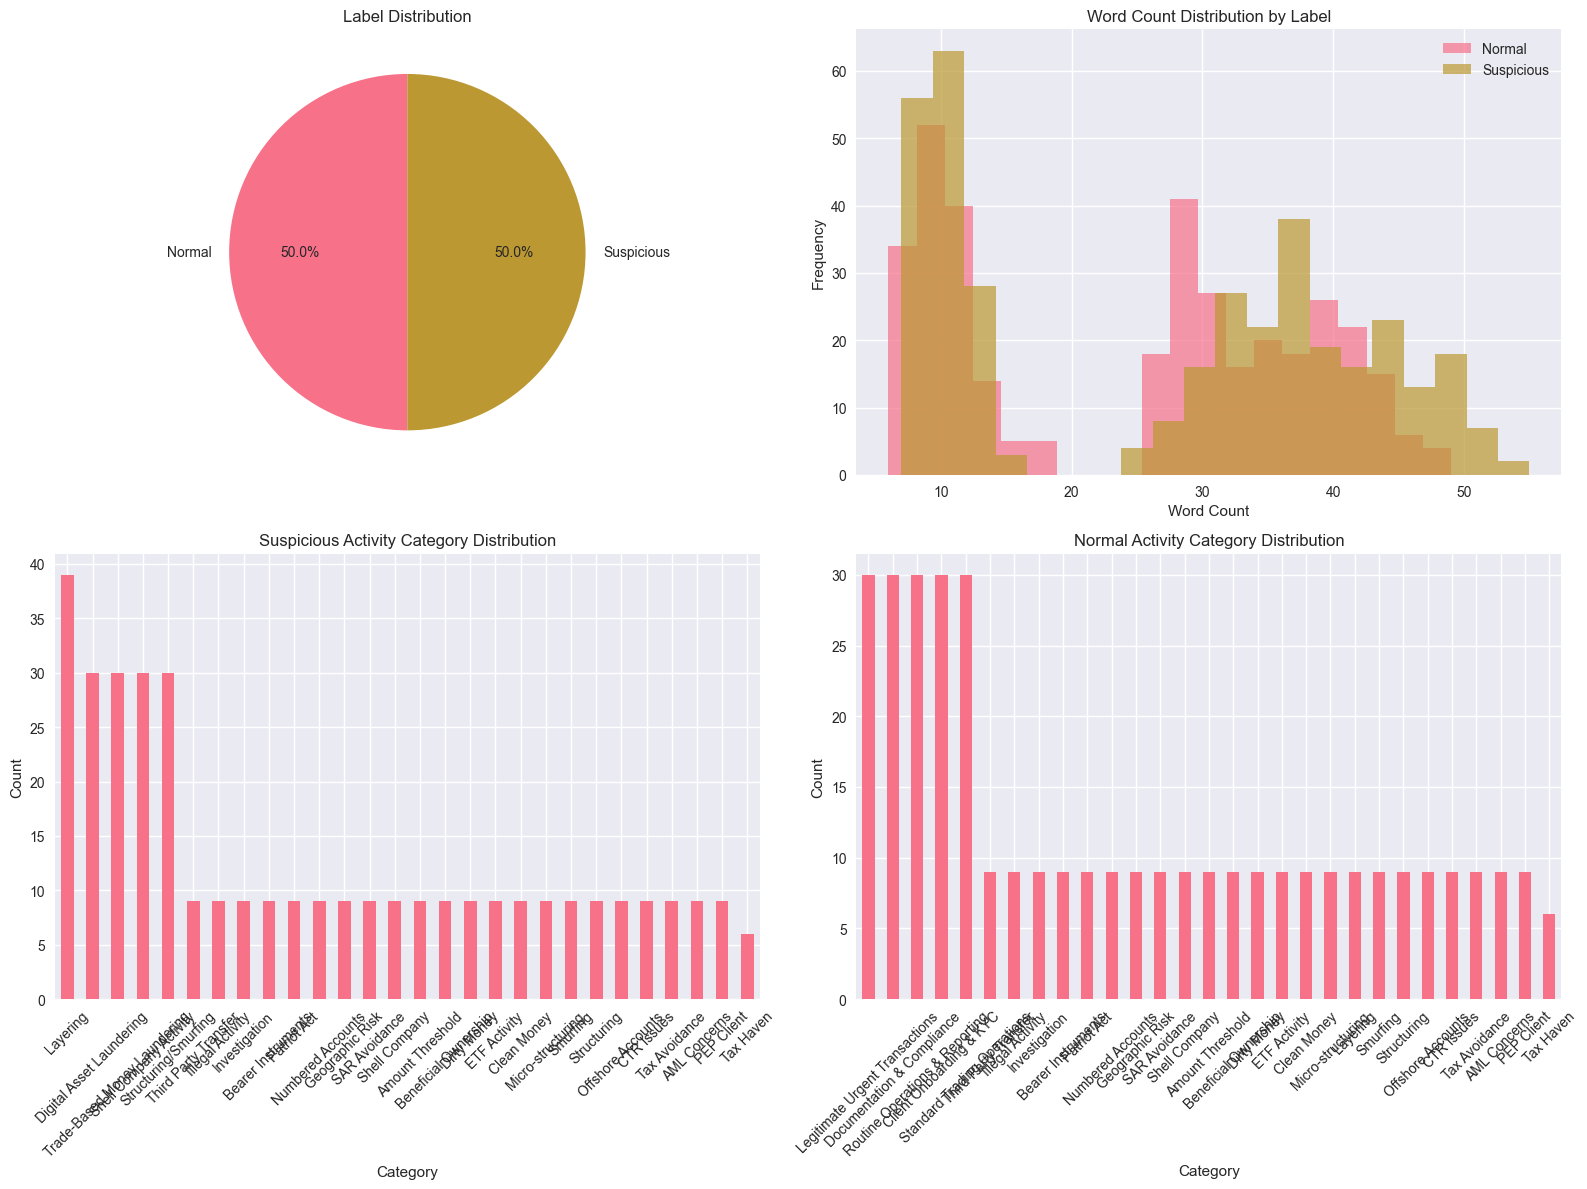

In [7]:
# Create visualizations of the dataset
print("📊 Dataset Visualizations:")
plot_dataset_overview(df, figsize=(16, 12))

## 2. Data Preparation

Split the data into training, validation, and test sets.

In [8]:
# Prepare data splits
print("🔄 Preparing data splits...")

X_train, X_val, X_test, y_train, y_val, y_test = prepare_data_splits(
    df, 
    test_size=0.2, 
    val_size=0.1, 
    random_state=42
)

print(f"✅ Data splits prepared:")
print(f"   📚 Training set: {len(X_train)} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"   🔍 Validation set: {len(X_val)} samples ({len(X_val)/len(df)*100:.1f}%)")
print(f"   🧪 Test set: {len(X_test)} samples ({len(X_test)/len(df)*100:.1f}%)")

# Check label distribution in each split
print(f"\n📊 Label distribution:")
print(f"   Training - Normal: {y_train.count(0)}, Suspicious: {y_train.count(1)}")
print(f"   Validation - Normal: {y_val.count(0)}, Suspicious: {y_val.count(1)}")
print(f"   Test - Normal: {y_test.count(0)}, Suspicious: {y_test.count(1)}")

# Show some training examples
print(f"\n🔍 Training examples:")
for i in range(3):
    label_name = "Normal" if y_train[i] == 0 else "Suspicious"
    print(f"   {i+1}. [{label_name}] {X_train[i][:80]}...")

🔄 Preparing data splits...
✅ Data splits prepared:
   📚 Training set: 507 samples (69.8%)
   🔍 Validation set: 73 samples (10.1%)
   🧪 Test set: 146 samples (20.1%)

📊 Label distribution:
   Training - Normal: 253, Suspicious: 254
   Validation - Normal: 37, Suspicious: 36
   Test - Normal: 73, Suspicious: 73

🔍 Training examples:
   1. [Suspicious] This arrangement violates Patriot Act requirements for beneficial ownership iden...
   2. [Normal] The system cleanup will optimize performance and remove errors. The data cleanin...
   3. [Normal] The client needs to deposit cash from their legitimate retail business operation...


## 3. Model Training

Train the financial crime detection model using our FinCrimeModel wrapper.

In [9]:
# Initialize the model
print("🤖 Initializing Financial Crime Detection Model...")

model = FinCrimeModel(model_name="xlm-roberta-base")
print("✅ Model initialized successfully!")

# Show model info
print(f"\n📋 Model Configuration:")
print(f"   🏗️ Base model: xlm-roberta-base")
print(f"   🎯 Task: Binary classification (Normal vs Suspicious)")
print(f"   💾 Labels: 0=Normal, 1=Suspicious")

🤖 Initializing Financial Crime Detection Model...
✅ Model initialized successfully!

📋 Model Configuration:
   🏗️ Base model: xlm-roberta-base
   🎯 Task: Binary classification (Normal vs Suspicious)
   💾 Labels: 0=Normal, 1=Suspicious


In [10]:
# Training configuration
print("⚙️ Training Configuration:")
print("   For demo purposes, we'll use reduced training parameters.")
print("   For production, increase epochs and batch sizes.")

# Option 1: Quick training (uncomment for fast demo)
training_config = {
    'epochs': 1,
    'batch_size': 8,
    'description': 'Quick training for demonstration'
}

# Option 2: Full training (uncomment for production)
# training_config = {
#     'epochs': 3,
#     'batch_size': 16,
#     'description': 'Full training for production'
# }

print(f"\n🚀 {training_config['description']}:")
print(f"   📊 Epochs: {training_config['epochs']}")
print(f"   📦 Batch size: {training_config['batch_size']}")
print(f"   ⏱️ Expected time: {'5-10 minutes' if training_config['epochs'] == 1 else '20-30 minutes'}")

⚙️ Training Configuration:
   For demo purposes, we'll use reduced training parameters.
   For production, increase epochs and batch sizes.

🚀 Quick training for demonstration:
   📊 Epochs: 1
   📦 Batch size: 8
   ⏱️ Expected time: 5-10 minutes


In [11]:
# Start training
print("🎯 Starting model training...")
print("" * 50)

# Train the model
training_results, test_dataset = model.train(
    X_train, y_train, 
    X_val, y_val, 
    X_test, y_test,
    output_dir='./notebook_trained_model'
)

print("" * 50)
print("🎉 Training completed!")
print(f"⏱️ Training time: {training_results.metrics.get('train_runtime', 'N/A'):.2f} seconds")
print(f"📉 Final training loss: {training_results.metrics.get('train_loss', 'N/A'):.4f}")
print(f"📊 Training samples processed: {training_results.metrics.get('train_samples', 'N/A')}")

🎯 Starting model training...



Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: xlm-roberta-base
Model parameters: 278,045,186
Starting training...


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.660400,0.603697,0.904110,0.904110,0.904449,0.904110
2,0.372600,0.149444,0.972603,0.972603,0.972603,0.972603
3,0.743500,0.335516,0.931507,0.931507,0.931857,0.931507
4,0.121400,0.451304,0.945205,0.944999,0.950551,0.945205
5,0.152900,0.177932,0.972603,0.972572,0.974008,0.972603


Training completed!
Training time: 50.12 seconds
Final training loss: 0.3657

🎉 Training completed!
⏱️ Training time: 50.12 seconds
📉 Final training loss: 0.3657
📊 Training samples processed: N/A


In [12]:
# Save the trained model
print("💾 Saving trained model...")
model.save_model('./notebook_trained_model')
print("✅ Model saved successfully!")
print("📁 Model location: ./notebook_trained_model")

💾 Saving trained model...
Model saved to: ./notebook_trained_model
✅ Model saved successfully!
📁 Model location: ./notebook_trained_model


## 4. Model Evaluation

Evaluate the trained model's performance using our evaluation wrapper.

In [17]:
# Load the trained model for evaluation
print("🔍 Loading trained model for evaluation...")

predictor = FinCrimePredictor('./notebook_trained_model')
evaluator = FinCrimeEvaluator(predictor)

print("✅ Model loaded for evaluation!")
print(f"📋 Model info: {predictor.get_model_info()}")

🔍 Loading trained model for evaluation...
Financial crime model loaded successfully from ./notebook_trained_model
✅ Model loaded for evaluation!
📋 Model info: {'model_path': './notebook_trained_model', 'model_type': 'xlm-roberta', 'vocab_size': 250002, 'max_length': 512, 'device': 'cpu'}


In [18]:
# Comprehensive model evaluation
print("📊 Model Performance Evaluation:")
print("=" * 60)

# Use our evaluator for comprehensive analysis
evaluator.print_evaluation_summary(X_test, y_test)

# Get detailed metrics
metrics = evaluator.evaluate(X_test, y_test)
print(f"\n📈 Key Performance Indicators:")
print(f"   🎯 Overall Accuracy: {metrics['accuracy']:.1%}")
print(f"   🔍 Suspicious Detection Precision: {metrics['precision_suspicious']:.1%}")
print(f"   📡 Suspicious Detection Recall: {metrics['recall_suspicious']:.1%}")
print(f"   ⚖️ F1-Score: {metrics['f1_suspicious']:.1%}")

📊 Model Performance Evaluation:
=== FINANCIAL CRIME MODEL EVALUATION SUMMARY ===
Total test samples: 146
Accuracy: 0.9726
Suspicious Activity Detection Precision: 0.9726
Suspicious Activity Detection Recall: 0.9726
Suspicious Activity Detection F1-Score: 0.9726
Specificity: 0.9726

Confusion Matrix:
True Negatives: 71
False Positives: 2
False Negatives: 2
True Positives: 71

Misclassification Analysis:
False Positives (Normal → Suspicious): 2
False Negatives (Suspicious → Normal): 2

Sample False Positives:
  1. Daily transaction monitoring report shows no unusual activity patterns identified....
  2. The PEP assessment for the new client came back negative. The enhanced screening didn't identify any...

Sample False Negatives:
  1. Invoice adjustments after shipment help accommodate fund transfer needs....
  2. Quality specifications are flexible as long as financial amounts work....

📈 Key Performance Indicators:
   🎯 Overall Accuracy: 97.3%
   🔍 Suspicious Detection Precision: 97.3%

📊 Performance Visualizations:


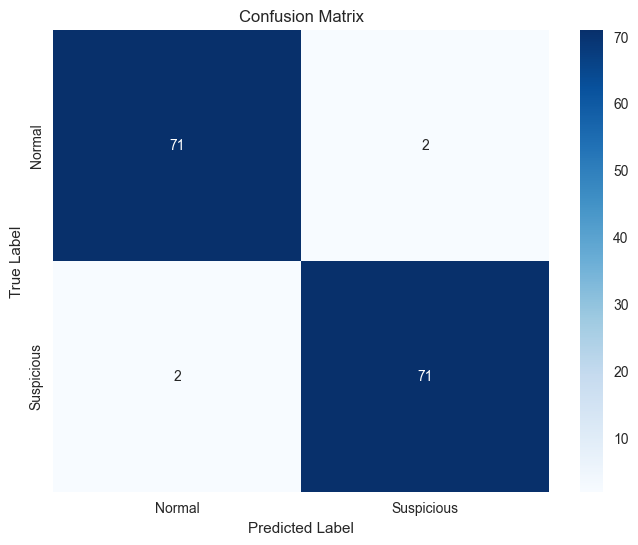

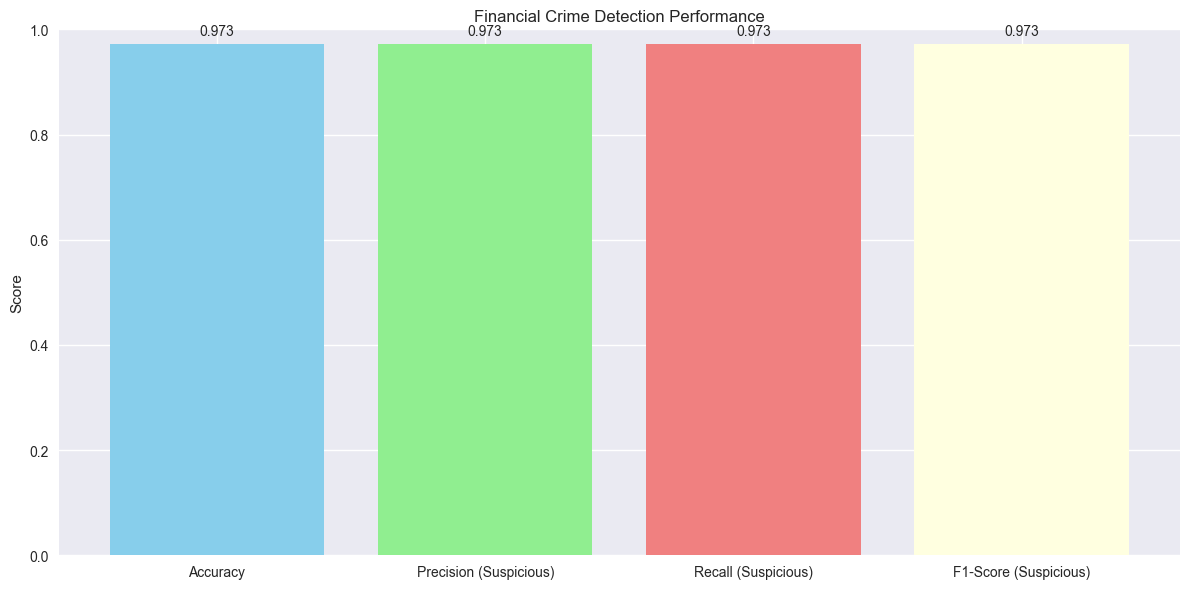

In [19]:
# Generate visualizations
print("📊 Performance Visualizations:")

# Confusion matrix
evaluator.plot_confusion_matrix(X_test, y_test, figsize=(8, 6))

# Performance metrics
evaluator.plot_performance_metrics(X_test, y_test, figsize=(12, 6))

In [20]:
# Analyze misclassified examples
print("🔍 Misclassification Analysis:")

misclassified = evaluator.find_misclassified_examples(X_test, y_test)

print(f"\n📊 Misclassification Summary:")
print(f"   ❌ False Positives (Normal→Suspicious): {len(misclassified['false_positives'])}")
print(f"   ❌ False Negatives (Suspicious→Normal): {len(misclassified['false_negatives'])}")

# Show some misclassified examples
if misclassified['false_positives']:
    print(f"\n🔍 Sample False Positives:")
    for i, fp in enumerate(misclassified['false_positives'][:3]):
        print(f"   {i+1}. {fp['text'][:100]}...")
        print(f"      Confidence: {fp['confidence']:.3f}")

if misclassified['false_negatives']:
    print(f"\n🔍 Sample False Negatives:")
    for i, fn in enumerate(misclassified['false_negatives'][:3]):
        print(f"   {i+1}. {fn['text'][:100]}...")
        print(f"      Confidence: {fn['confidence']:.3f}")

🔍 Misclassification Analysis:

📊 Misclassification Summary:
   ❌ False Positives (Normal→Suspicious): 2
   ❌ False Negatives (Suspicious→Normal): 2

🔍 Sample False Positives:
   1. Daily transaction monitoring report shows no unusual activity patterns identified....
      Confidence: 0.670
   2. The PEP assessment for the new client came back negative. The enhanced screening didn't identify any...
      Confidence: 0.850

🔍 Sample False Negatives:
   1. Invoice adjustments after shipment help accommodate fund transfer needs....
      Confidence: 0.931
   2. Quality specifications are flexible as long as financial amounts work....
      Confidence: 0.924


## 5. Prediction Examples

Test the model on new examples to see how it performs.

In [21]:
# Test on predefined examples
print("🧪 Testing on Predefined Examples:")
print("=" * 50)

for i, example in enumerate(TEST_EXAMPLES, 1):
    result = predictor.predict(example['text'])
    expected = example['expected']
    actual = result['label']
    confidence = result['confidence']
    
    # Check if prediction matches expectation
    status = "✅" if actual == expected else "❌"
    
    print(f"\n{status} Example {i}:")
    print(f"   📝 Text: {example['text'][:80]}...")
    print(f"   🎯 Expected: {expected}")
    print(f"   🤖 Predicted: {actual} (Confidence: {confidence:.3f})")

🧪 Testing on Predefined Examples:


NameError: name 'TEST_EXAMPLES' is not defined

In [ ]:
# Test on custom examples
print("🎯 Testing on Additional Examples:")
print("=" * 50)

# Add your own test examples here
custom_examples = [
    "The client wants to structure payments to avoid CTR filing requirements",
    "Standard wire transfer with proper KYC documentation completed",
    "Using multiple bank accounts to break up large transactions",
    "Legitimate business transaction with board approval",
    "Offshore shell company setup to hide beneficial ownership",
    "Regular monthly payment to supplier with invoice documentation"
]

for i, text in enumerate(custom_examples, 1):
    result = predictor.predict(text)
    detailed_result = predictor.predict_with_probabilities(text)
    
    print(f"\n📝 Example {i}:")
    print(f"   Text: {text}")
    print(f"   🤖 Prediction: {result['label']} (Confidence: {result['confidence']:.3f})")
    print(f"   📊 Probabilities: Normal={detailed_result['probabilities']['Normal']:.3f}, Suspicious={detailed_result['probabilities']['Suspicious']:.3f}")

In [ ]:
# Interactive prediction function
def predict_text(text):
    """Interactive prediction function for notebook use"""
    result = predictor.predict_with_probabilities(text)
    
    print(f"📝 Input: {text}")
    print(f"🤖 Prediction: {result['label']}")
    print(f"📊 Confidence: {result['confidence']:.3f}")
    print(f"📈 Probabilities:")
    print(f"   Normal: {result['probabilities']['Normal']:.3f}")
    print(f"   Suspicious: {result['probabilities']['Suspicious']:.3f}")
    
    return result

# Example usage
print("🔧 Interactive Prediction Function Ready!")
print("\nExample usage:")
print('predict_text("Your text here")')

# Test the function
print("\n🧪 Testing the function:")
predict_text("Keep the deposit amounts under the reporting threshold")

## 6. Analysis & Insights

Analyze the model's behavior and provide insights.

In [ ]:
# Confidence score analysis
print("📊 Confidence Score Analysis:")
print("=" * 40)

# Get predictions for all test examples
all_predictions = []
for text, true_label in zip(X_test, y_test):
    result = predictor.predict(text)
    all_predictions.append({
        'text': text,
        'true_label': true_label,
        'predicted_label': result['class_id'],
        'confidence': result['confidence'],
        'correct': true_label == result['class_id']
    })

# Convert to DataFrame for analysis
results_df = pd.DataFrame(all_predictions)

# Confidence statistics
print(f"📈 Overall Confidence Statistics:")
print(f"   Mean confidence: {results_df['confidence'].mean():.3f}")
print(f"   Median confidence: {results_df['confidence'].median():.3f}")
print(f"   Min confidence: {results_df['confidence'].min():.3f}")
print(f"   Max confidence: {results_df['confidence'].max():.3f}")

# Confidence by correctness
print(f"\n🎯 Confidence by Prediction Correctness:")
correct_conf = results_df[results_df['correct']]['confidence'].mean()
incorrect_conf = results_df[~results_df['correct']]['confidence'].mean()
print(f"   Correct predictions: {correct_conf:.3f}")
print(f"   Incorrect predictions: {incorrect_conf:.3f}")

# Plot confidence distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(results_df[results_df['correct']]['confidence'], alpha=0.7, label='Correct', bins=20)
plt.hist(results_df[~results_df['correct']]['confidence'], alpha=0.7, label='Incorrect', bins=20)
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.title('Confidence Distribution by Correctness')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(results_df['confidence'], results_df['correct'], alpha=0.6)
plt.xlabel('Confidence Score')
plt.ylabel('Correct (1) vs Incorrect (0)')
plt.title('Confidence vs Correctness')
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

In [ ]:
# Model insights and recommendations
print("🔍 Model Insights & Recommendations:")
print("=" * 50)

# Calculate key metrics
accuracy = metrics['accuracy']
precision = metrics['precision_suspicious']
recall = metrics['recall_suspicious']
f1 = metrics['f1_suspicious']

print(f"\n📊 Performance Assessment:")
if accuracy >= 0.9:
    print(f"   ✅ Excellent accuracy ({accuracy:.1%}) - Model performs very well")
elif accuracy >= 0.8:
    print(f"   ✅ Good accuracy ({accuracy:.1%}) - Model performs well")
elif accuracy >= 0.7:
    print(f"   ⚠️ Moderate accuracy ({accuracy:.1%}) - Room for improvement")
else:
    print(f"   ❌ Low accuracy ({accuracy:.1%}) - Needs significant improvement")

print(f"\n🎯 Suspicious Activity Detection:")
if precision >= 0.9 and recall >= 0.9:
    print(f"   ✅ Excellent detection capability (P:{precision:.1%}, R:{recall:.1%})")
elif precision >= 0.8 and recall >= 0.8:
    print(f"   ✅ Good detection capability (P:{precision:.1%}, R:{recall:.1%})")
else:
    print(f"   ⚠️ Detection needs improvement (P:{precision:.1%}, R:{recall:.1%})")

print(f"\n🔧 Recommendations:")
if len(misclassified['false_positives']) > len(misclassified['false_negatives']):
    print(f"   📈 Consider increasing precision (too many false alarms)")
elif len(misclassified['false_negatives']) > len(misclassified['false_positives']):
    print(f"   📈 Consider increasing recall (missing suspicious cases)")
else:
    print(f"   ⚖️ Good balance between precision and recall")

print(f"\n🚀 Next Steps:")
print(f"   1. Collect more training data for better performance")
print(f"   2. Fine-tune model parameters for your specific use case")
print(f"   3. Consider ensemble methods for improved accuracy")
print(f"   4. Implement continuous learning with new data")
print(f"   5. Add domain-specific features if needed")

In [ ]:
# Generate classification report
print("📋 Detailed Classification Report:")
print("=" * 40)

classification_report = evaluator.generate_classification_report(X_test, y_test)
print(classification_report)

## 7. Summary & Conclusion

Summary of the complete financial crime detection workflow.

In [ ]:
print("📝 FINANCIAL CRIME DETECTION - DEMO SUMMARY")
print("=" * 60)

print(f"\n📊 Dataset Information:")
print(f"   📁 Source: {data_source}")
print(f"   📏 Total samples: {len(df)}")
print(f"   🏷️ Normal samples: {len(df[df['label'] == 0])}")
print(f"   🚨 Suspicious samples: {len(df[df['label'] == 1])}")

print(f"\n🤖 Model Information:")
print(f"   🏗️ Architecture: XLM-RoBERTa Base")
print(f"   🎯 Task: Binary Classification")
print(f"   📊 Training samples: {len(X_train)}")
print(f"   🔍 Validation samples: {len(X_val)}")
print(f"   🧪 Test samples: {len(X_test)}")

print(f"\n📈 Performance Results:")
print(f"   🎯 Accuracy: {metrics['accuracy']:.1%}")
print(f"   🔍 Precision: {metrics['precision_suspicious']:.1%}")
print(f"   📡 Recall: {metrics['recall_suspicious']:.1%}")
print(f"   ⚖️ F1-Score: {metrics['f1_suspicious']:.1%}")
print(f"   📊 True Positives: {metrics['true_positives']}")
print(f"   📊 True Negatives: {metrics['true_negatives']}")
print(f"   ❌ False Positives: {metrics['false_positives']}")
print(f"   ❌ False Negatives: {metrics['false_negatives']}")

print(f"\n🔧 Technical Implementation:")
print(f"   📦 Package: Generic Financial Crime Detection Framework")
print(f"   🐍 Components: FinCrimeModel, FinCrimePredictor, FinCrimeEvaluator")
print(f"   🔄 Workflow: Load → Prepare → Train → Evaluate → Predict")
print(f"   📁 Model saved: ./notebook_trained_model")


print(f"\n🎉 Demo completed successfully!")
